Import the StringArt class first.

In [339]:
import importlib                    # this is just for my debugging purposes - not necessary unless you modify string_art.py
import string_art
importlib.reload(string_art)        # this is just for my debugging purposes - not necessary unless you modify string_art.py
from string_art import StringArt

To start the new string art you must:
 1) define the art by calling StringArt(...)
 2) set image by calling set_image(...)

**number_of_lines** is the number of line segments that creates the final art and **number_of_nails** is the number of nails on the frame. You can set **circle_radius** in case you have frame of given dimension and you want to compute how long string you will need to create given string art - if not provided, it is set to 1 by default.

In [340]:
string_art = StringArt(number_of_lines = 2000,
                       number_of_nails = 300)
string_art.set_image("./test_files/test_image_1.png")

0

Let us now compute the sequence of the nails that the string has to follow in order to create selected image. This will take a while when running for the first time for a new number of nails. However, the other times algorithm runs with this number of nails will be faster because it creates a cache file with results of computations that are repeated. These cache files are in the same folder as this notebook and they are named line_masks_sparse_<nails_number>.pkl. They can be deleted and if the file is missing it will be computed again, but computing this file takes the majority of the time. Otherwise, the algorithm is "reasonably" fast even though it is just a "stupid" greedy algorithm. There are other parameters that can be passed to the function, such as:

 **print_interval** - Art is being computed and result printed every time printed_interval number of lines is added.

 **tested_nails** - Number of possible lines that are checked before the new line is drawn. Gets set to the number of nails by default, unless specified otherwise.

 **mask_weight** - The smaller, the finer the resulting image can be. In range 0-255. 6 works well with high enough number of lines and nails.

 **use_forbidden_areas** - If set to True, image can be generated with "holes" - see notebook below.

 **allow_crossing_lines** - Allow some lines cross the forbidden area.

 **crossing_lines_acceptance** - The probability (number between 0 to 1) with which the line is being drawn across this area.


Currently computing line 0 out of 2000.
Currently computing line 500 out of 2000.


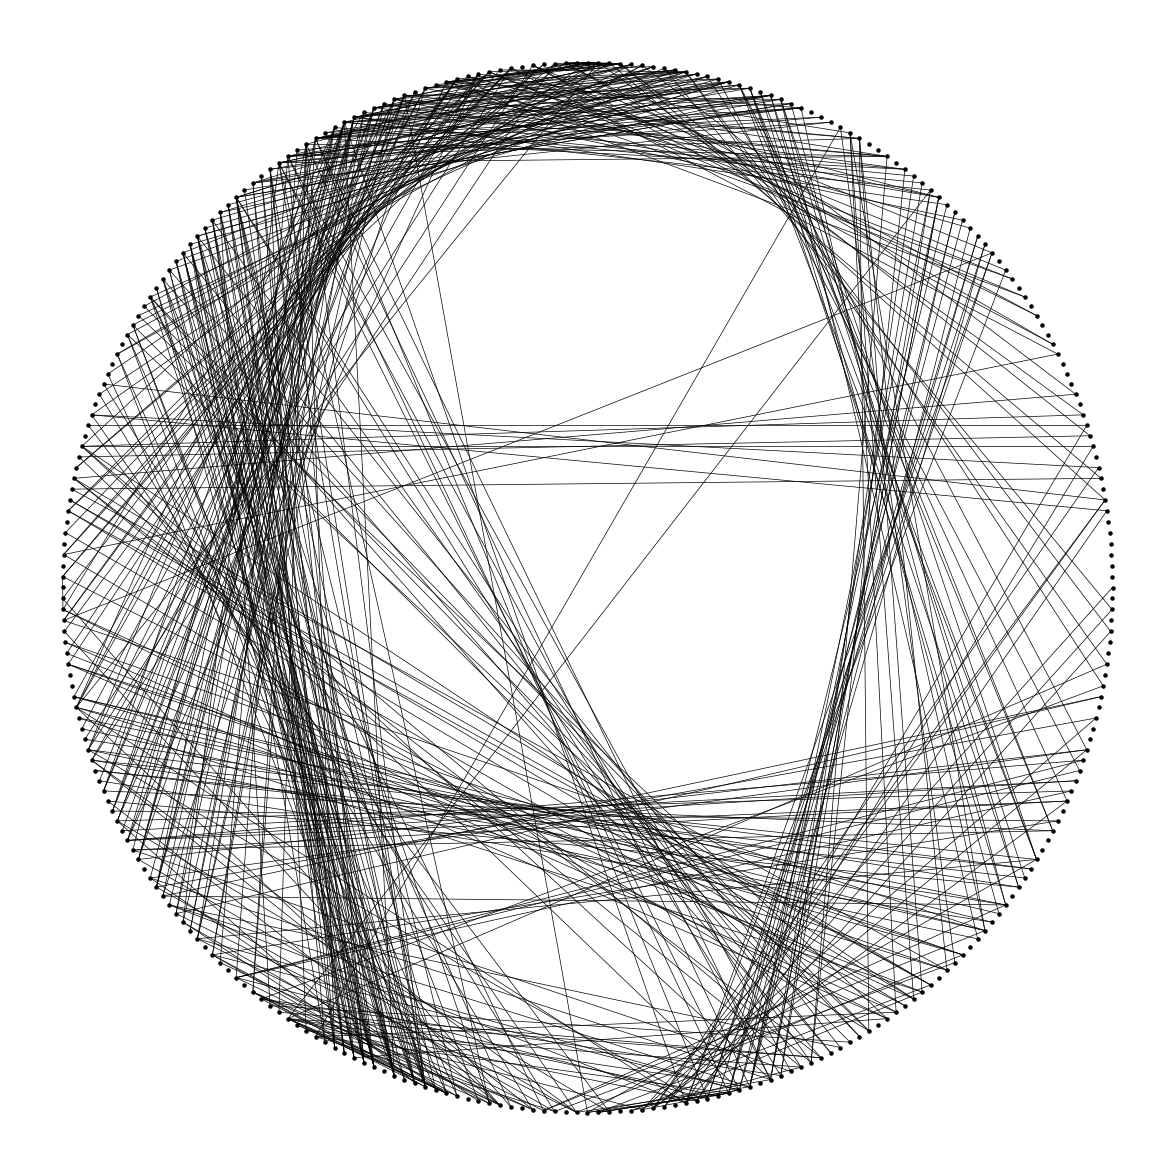

Currently computing line 1000 out of 2000.


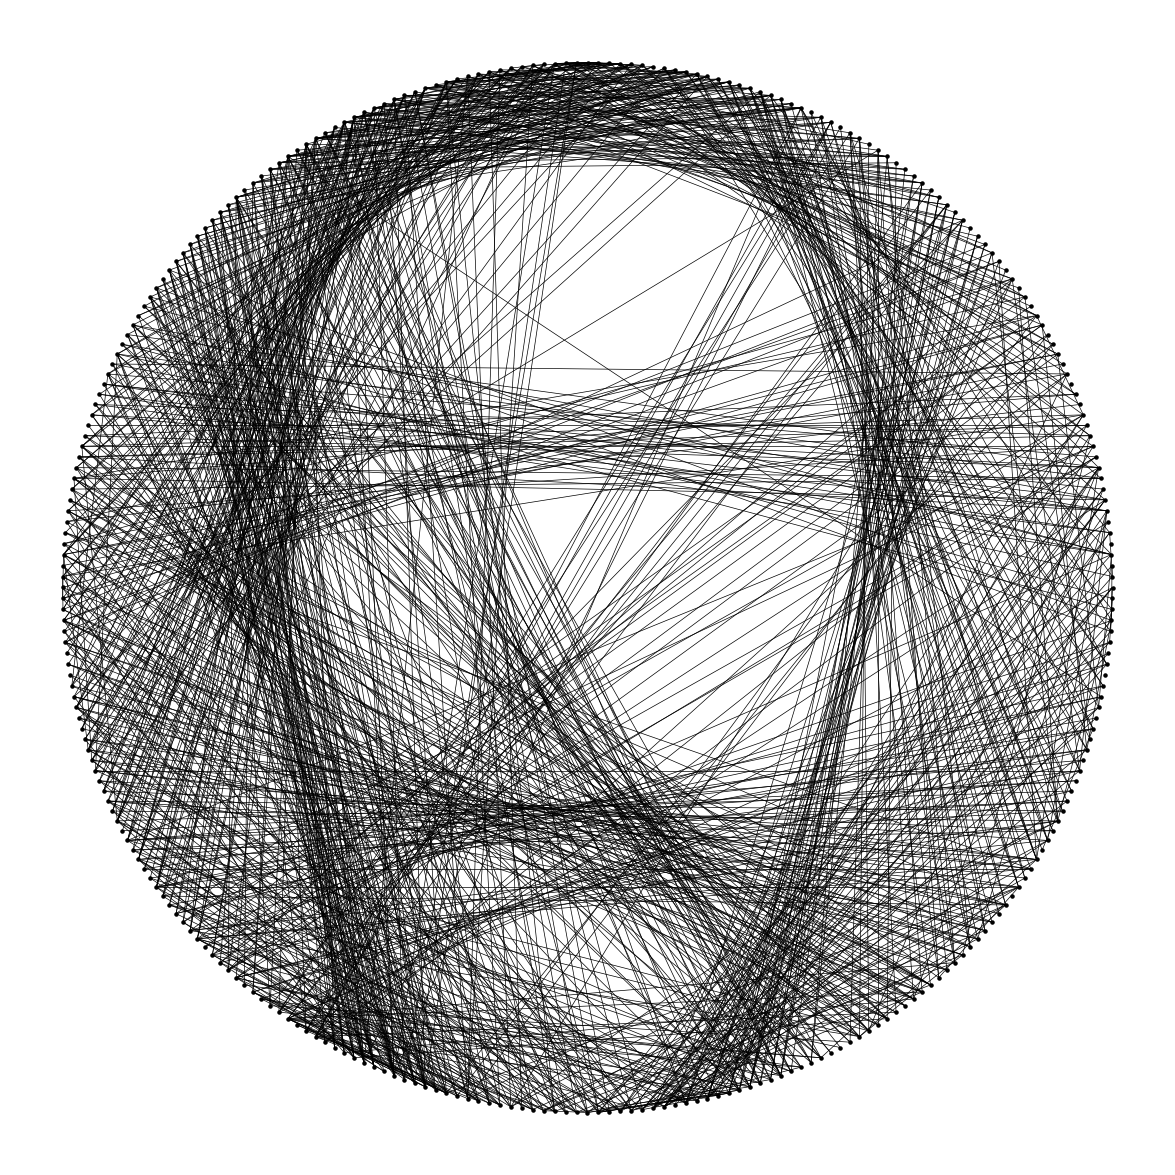

Currently computing line 1500 out of 2000.


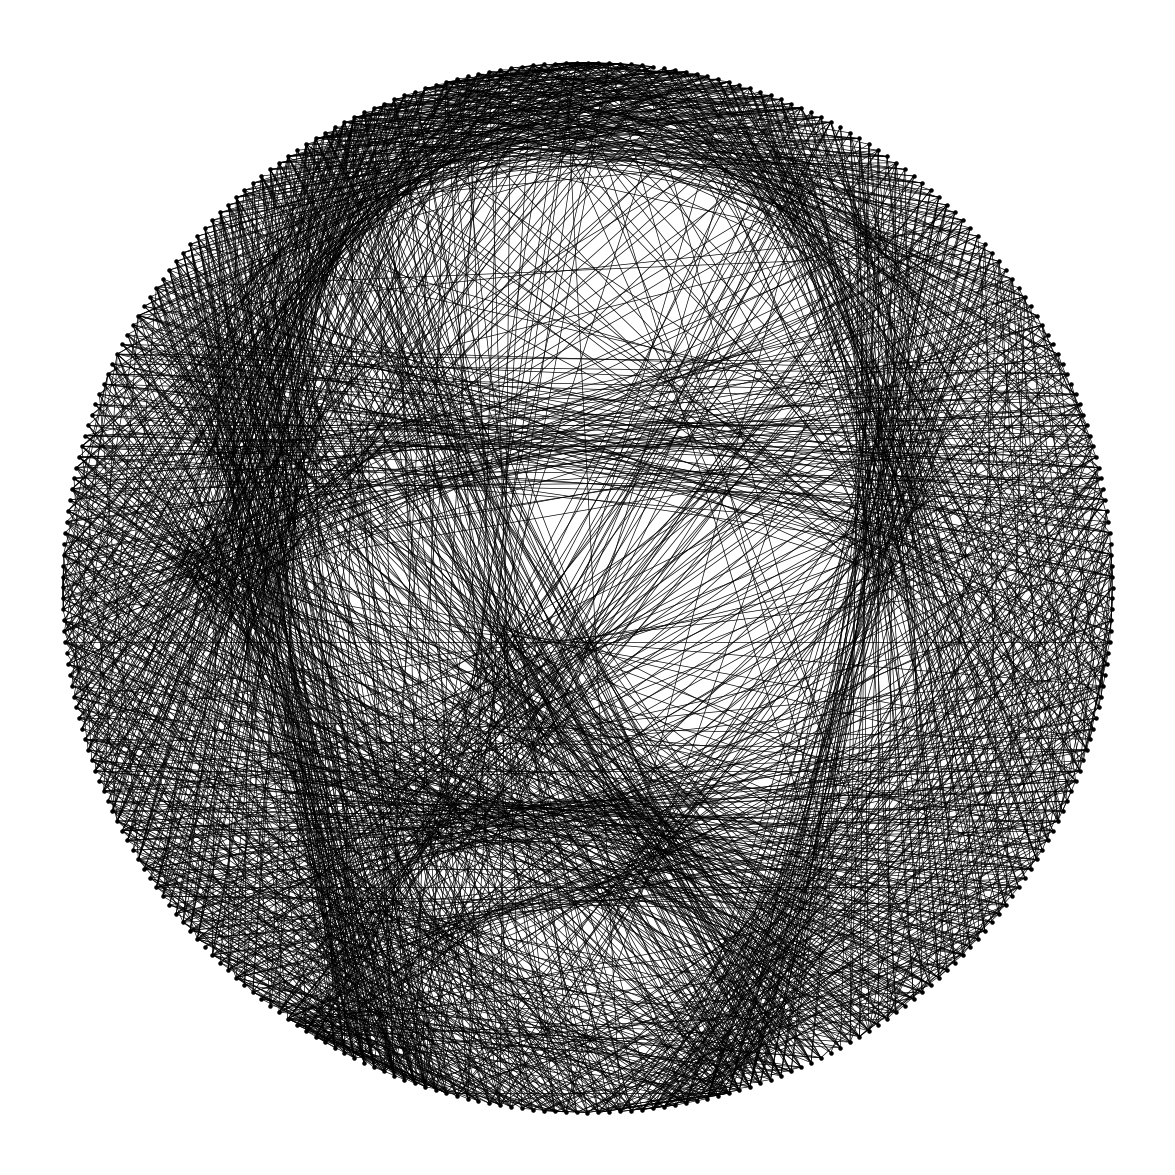

Final image with 2000 lines.


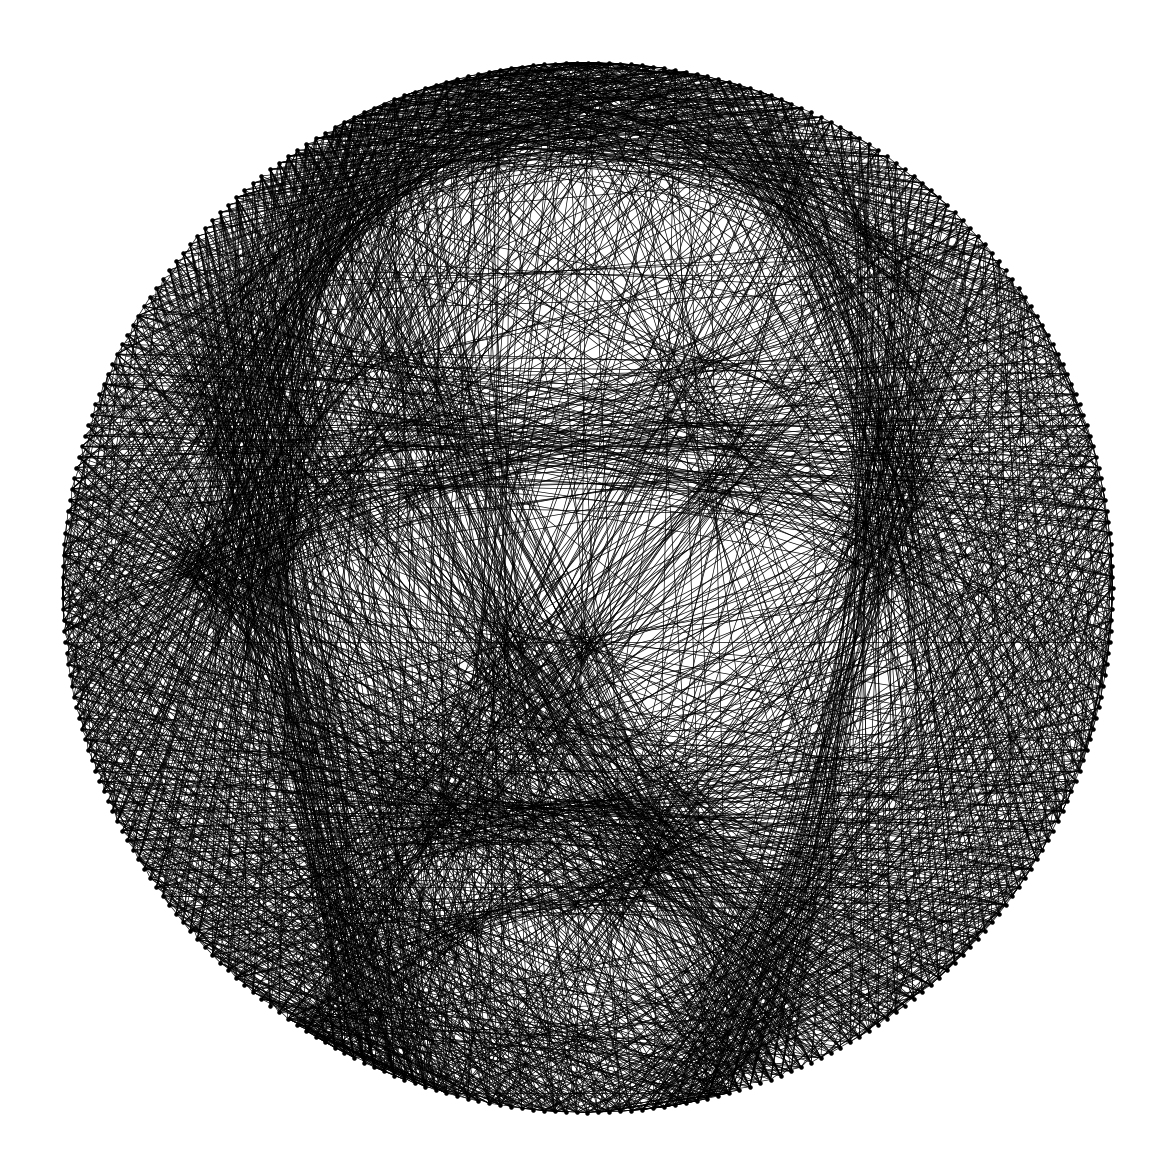

0

In [341]:
string_art.compute_string()

We can also draw only the final art by calling draw_string().

Display the art:


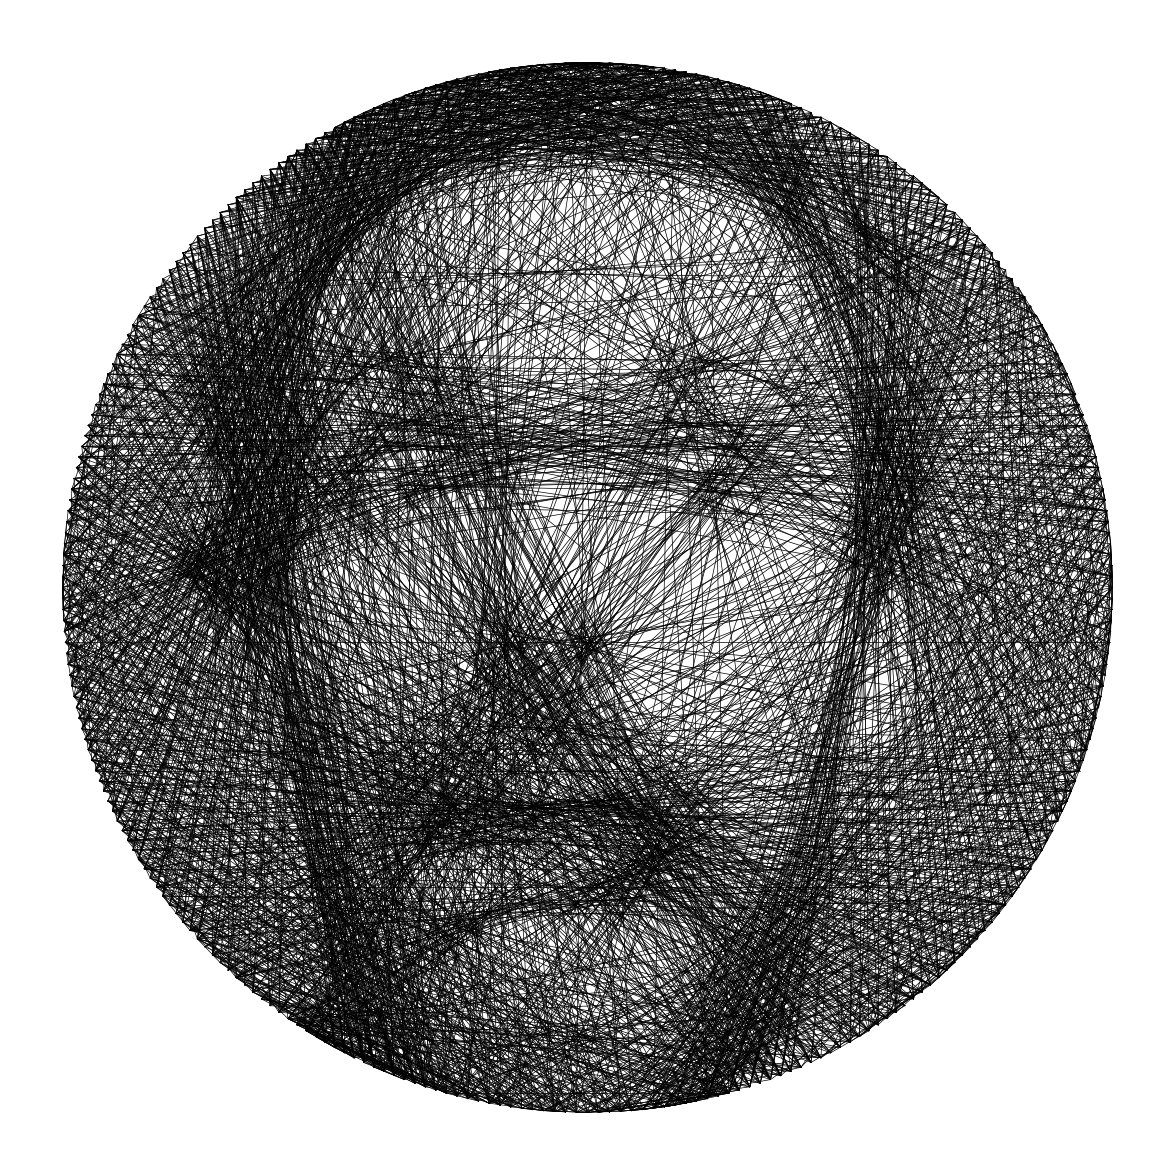

0

In [342]:
print("Display the art:")
string_art.draw_string()

And we can estimate how long string we are going to need (it doesn't count the fact that some length is necessary to go around nail, so the estimate is just approximate). Units are the same as units of the radius of circle. Circle has by default radius 1 unit (can be changed when creating StringArt class).

In [343]:
print(f"The stringth length is {string_art.get_string_length()} units.")

The stringth length is 2744.5919173550637 units.


We can also set forbidden mask. This is False by default, but you can change it by use_forbidden_areas_t = True. This option makes sure, that no line crosses the black area in the mask. Have a look at the mask. The areas that are possible to create are only convex shapes. This basically creates "a hole" in our canvas. However, the bigger the hole is, the worse is the quality of resulting image. Approximately circular holes in the centre of the image work the best. Get creative! ;)

In [ ]:
string_art = StringArt(number_of_lines = 2000,
                       number_of_nails = 300)
string_art.set_image("./test_files/test_image_2.png")
string_art.set_forbidden_mask("./test_files/test_image_2_mask.png")
string_art.compute_string(use_forbidden_areas = True,
                          allow_crossing_lines = False,
                          crossing_lines_acceptance = 0.2)

Currently computing line 0 out of 2000.
